# Plant Disease Prediction


In [2]:
!pip install opendatasets

In [54]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset')

Skipping, found downloaded files in "./new-plant-diseases-dataset" (use force=True to force download)


# Importing libraries




In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Preprocessing


### Training Image preprocessing


In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing


In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17572 files belonging to 38 classes.


### To avoid Overshooting Loss function



1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature



In [7]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [8]:
for x,y in training_set:
  print(x,x.shape)
  print(y,y.shape)
  break


tf.Tensor(
[[[[164.5  159.5  156.5 ]
   [164.5  159.5  156.5 ]
   [166.   161.   158.  ]
   ...
   [148.5  140.5  137.5 ]
   [136.   128.   125.  ]
   [141.5  133.5  130.5 ]]

  [[166.   161.   158.  ]
   [165.   160.   157.  ]
   [166.25 161.25 158.25]
   ...
   [134.5  126.5  123.5 ]
   [142.5  134.5  131.5 ]
   [141.25 133.25 130.25]]

  [[169.5  164.5  161.5 ]
   [166.75 161.75 158.75]
   [168.   163.   160.  ]
   ...
   [141.25 133.25 130.25]
   [150.25 142.25 139.25]
   [138.5  130.5  127.5 ]]

  ...

  [[168.25 161.25 155.25]
   [167.75 160.75 154.75]
   [166.5  159.5  153.5 ]
   ...
   [120.75 109.75 103.75]
   [129.75 118.75 112.75]
   [131.75 120.75 114.75]]

  [[166.   159.   153.  ]
   [167.75 160.75 154.75]
   [167.5  160.5  154.5 ]
   ...
   [128.5  117.5  111.5 ]
   [128.75 117.75 111.75]
   [131.25 120.25 114.25]]

  [[166.5  159.5  153.5 ]
   [171.25 164.25 158.25]
   [173.   166.   160.  ]
   ...
   [134.25 123.25 117.25]
   [130.75 119.75 113.75]
   [131.5  120.5  11

In [9]:
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.models import Sequential


# Building Model

In [10]:
cnn = tf.keras.models.Sequential()

# Building Convolution Layer

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [13]:

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [17]:
cnn.add(tf.keras.layers.Flatten())

In [18]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [19]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [20]:

#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

# Compiling and Training Phase

In [21]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [22]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 161s 66ms/step - accuracy: 0.4119 - loss: 2.0688 - val_accuracy: 0.8212 - val_loss: 0.5560
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 176s 60ms/step - accuracy: 0.8463 - loss: 0.4889 - val_accuracy: 0.8965 - val_loss: 0.3150
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 60ms/step - accuracy: 0.9083 - loss: 0.2843 - val_accuracy: 0.9463 - val_loss: 0.1699
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 131s 60ms/step - accuracy: 0.9365 - loss: 0.1920 - val_accuracy: 0.9414 - val_loss: 0.1863
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 150s 63ms/step - accuracy: 0.9551 - loss: 0.1395 - val_accuracy: 0.9484 - val_loss: 0.1678
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 139s 63ms/step - accuracy: 0.9656 - loss: 0.1051 - val_accuracy: 0.9651 - val_loss: 0.1153
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 134s 60ms/step - accuracy: 0.9708 - loss: 0.0883 - val_accuracy: 0.9659 - val_loss: 0.1073
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 139s 63ms/step - accuracy: 

In [24]:


#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 57s 26ms/step - accuracy: 0.9967 - loss: 0.0114
Training accuracy: 0.9973540306091309


In [25]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9773 - loss: 0.0752
Validation accuracy: 0.977862536907196


# Saving Model

In [26]:
cnn.save('plant_Disease_prediction.keras')

In [27]:
from google.colab import files
files.download('plant_Disease_prediction.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6077246069908142,
  0.8652108907699585,
  0.9164947867393494,
  0.9403656125068665,
  0.956682562828064,
  0.9660715460777283,
  0.9717333912849426,
  0.9768689274787903,
  0.9793441891670227,
  0.9823600649833679],
 'loss': [1.3219608068466187,
  0.42535337805747986,
  0.25875917077064514,
  0.1809350699186325,
  0.13381646573543549,
  0.1025153174996376,
  0.08578016608953476,
  0.07093004137277603,
  0.06393144279718399,
  0.05516517534852028],
 'val_accuracy': [0.8211928009986877,
  0.8964830636978149,
  0.9462781548500061,
  0.9413840174674988,
  0.9483838081359863,
  0.965114951133728,
  0.9659116864204407,
  0.9572046399116516,
  0.9638060331344604,
  0.977862536907196],
 'val_loss': [0.5559592843055725,
  0.31504544615745544,
  0.1699151247739792,
  0.186295747756958,
  0.16778050363063812,
  0.11532638221979141,
  0.10733424872159958,
  0.14429357647895813,
  0.11931638419628143,
  0.07152080535888672]}

In [29]:

#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [30]:
from google.colab import files
files.download('training_hist.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


# Accuracy Visualization

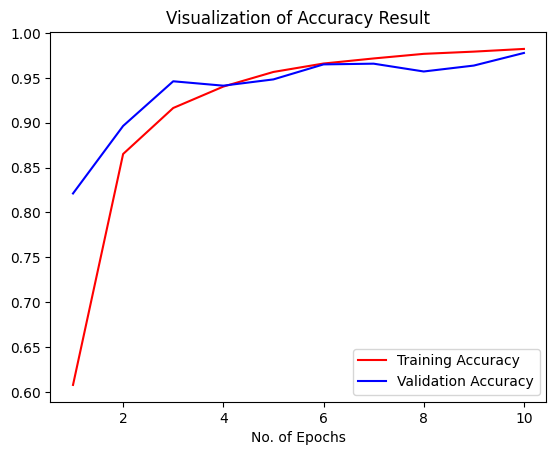

In [32]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Some other metrics for model evaluation

In [33]:
class_name = validation_set.class_names
class_name


['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [34]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [35]:
y_pred = cnn.predict(test_set)
y_pred,y_pred.shape

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step


(array([[9.99999881e-01, 1.43776822e-08, 3.15517543e-11, ...,
         7.49039242e-17, 9.92168549e-16, 9.60605242e-16],
        [9.99999762e-01, 3.46063837e-11, 2.73536159e-11, ...,
         2.59700857e-16, 4.92115502e-16, 2.49363456e-16],
        [1.00000000e+00, 1.36516604e-10, 4.10376323e-13, ...,
         2.78248359e-19, 3.74097713e-16, 5.59248421e-16],
        ...,
        [3.94095601e-09, 4.10516204e-11, 6.08541825e-07, ...,
         1.99552002e-08, 4.22071222e-09, 9.99355853e-01],
        [1.90669525e-09, 1.05634555e-11, 7.56596705e-08, ...,
         1.70108905e-08, 2.11209383e-09, 9.99992251e-01],
        [2.34466102e-18, 4.58572264e-18, 3.50835054e-15, ...,
         5.05517628e-19, 2.32067461e-15, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [36]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [37]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [38]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [39]:
true_categories


<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [40]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [41]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.98      0.98       504
                                 Apple___Black_rot       1.00      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.96      1.00      0.98       440
                                   Apple___healthy       0.96      0.98      0.97       502
                               Blueberry___healthy       0.98      0.99      0.99       454
          Cherry_(including_sour)___Powdery_mildew       0.99      1.00      0.99       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.94      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.97      0.

In [42]:
cm= confusion_matrix(Y_true,predicted_categories)
cm

array([[496,   0,   0, ...,   0,   0,   0],
       [  6, 486,   1, ...,   0,   0,   0],
       [  0,   0, 439, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 486,   0,   0],
       [  0,   0,   0, ...,   0, 442,   0],
       [  0,   0,   1, ...,   0,   0, 479]])

# Confusion Matrix Visualization


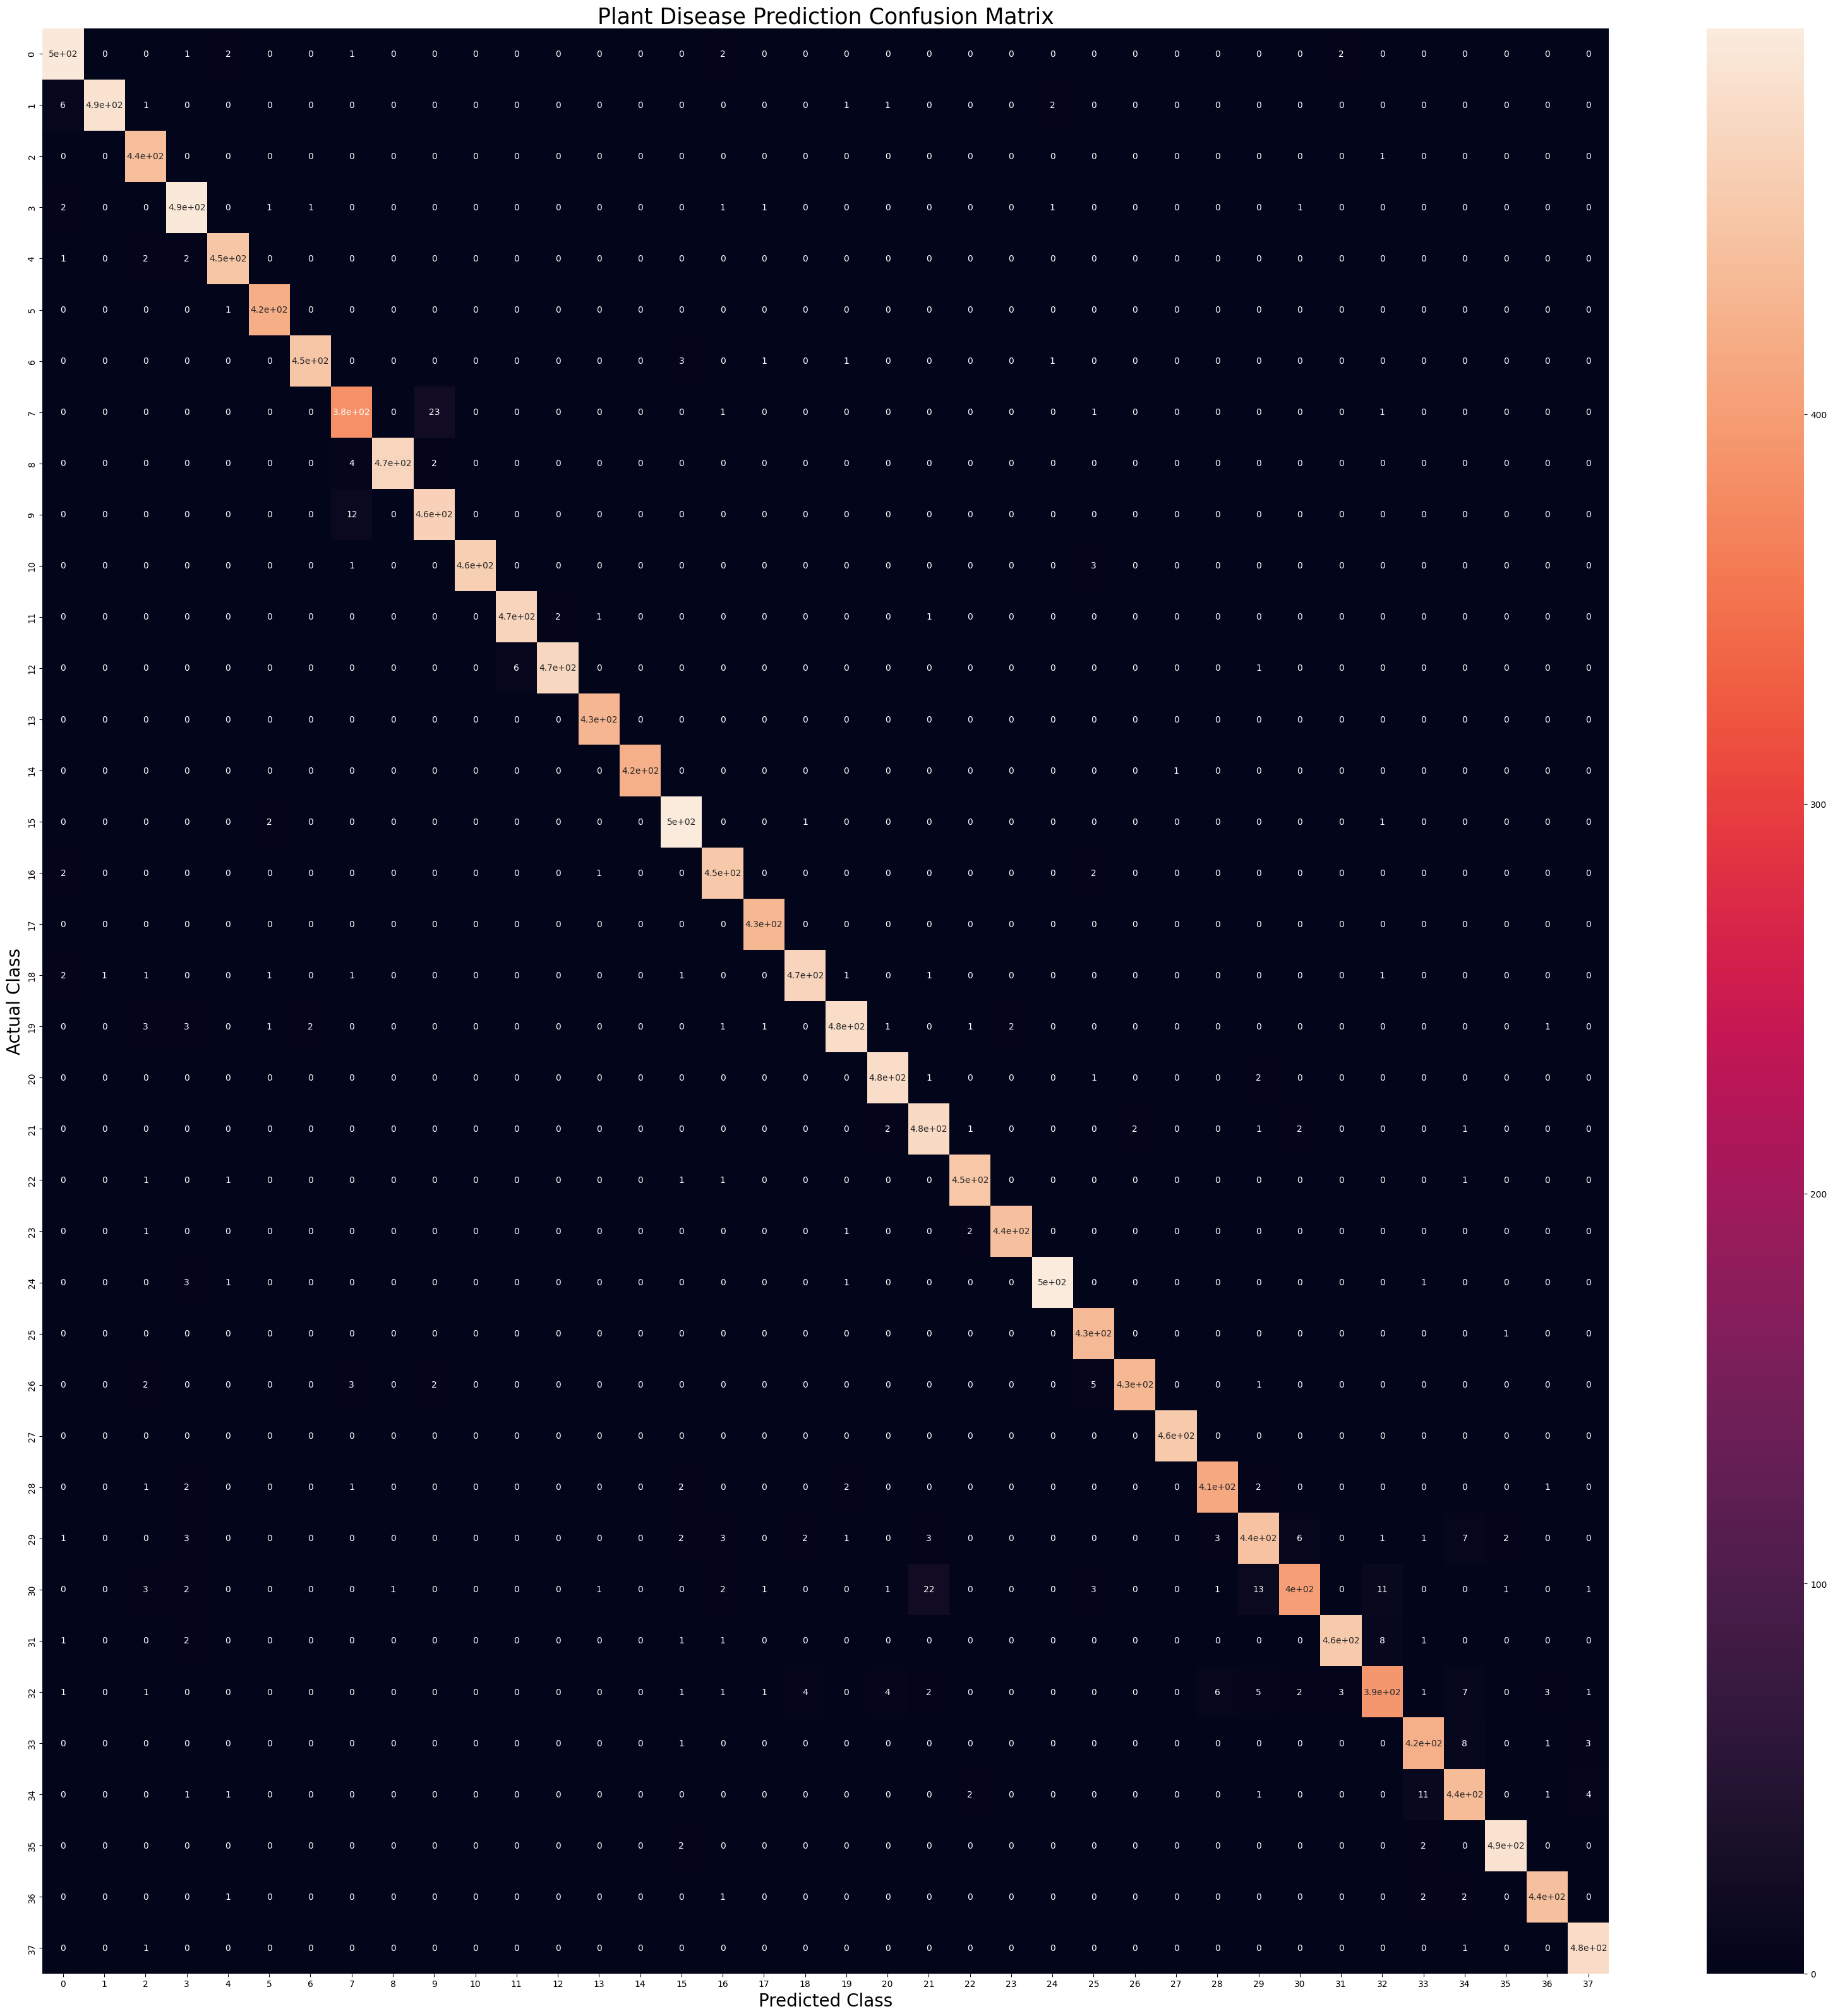

In [43]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [45]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

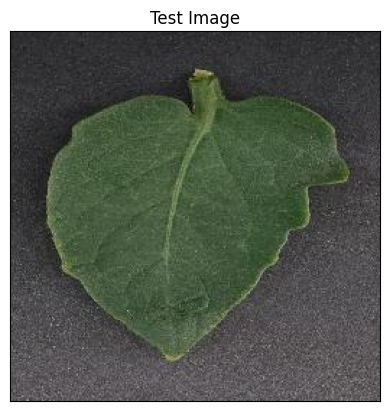

In [46]:
#Test Image Visualization
import cv2
image_path = '/content/new-plant-diseases-dataset/test/test/TomatoHealthy2.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()


In [47]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
print(input_arr.shape)

(1, 128, 128, 3)


In [48]:
predictions = cnn.predict(input_arr)
print(predictions,predictions.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step
[[3.27804798e-07 7.21882074e-08 4.51478672e-06 4.55161826e-05
  1.10476924e-06 1.48561764e-06 2.69962385e-07 8.00843409e-08
  2.69013256e-09 3.72757221e-08 7.53422711e-08 7.46323980e-09
  8.04094356e-08 1.21592887e-08 3.51032980e-08 2.47890711e-07
  5.64223797e-07 5.45160930e-08 1.87505620e-08 1.10749879e-05
  1.17330913e-07 2.61648552e-07 1.80115649e-06 4.48726951e-07
  6.00571809e-07 6.36890836e-05 4.98877561e-08 1.17986438e-07
  3.17522290e-06 2.29710963e-07 2.19921858e-05 3.88731951e-06
  2.67184932e-05 7.14483031e-06 4.96588240e-04 1.02707034e-07
  1.96015890e-06 9.99305606e-01]] (1, 38)


In [49]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)


37


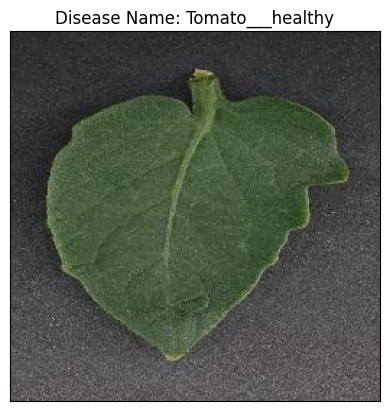

In [50]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()